In [ ]:
EXPERIMENT = "remove_edge_10"

Statistics for Original Graph:
Number of nodes: 150
Number of edges: 1040
Average in-degree: 6.93
Average out-degree: 6.93
Density: 0.0465

Statistics for Perturbed Graph:
Number of nodes: 150
Number of edges: 936
Average in-degree: 6.24
Average out-degree: 6.24
Density: 0.0419



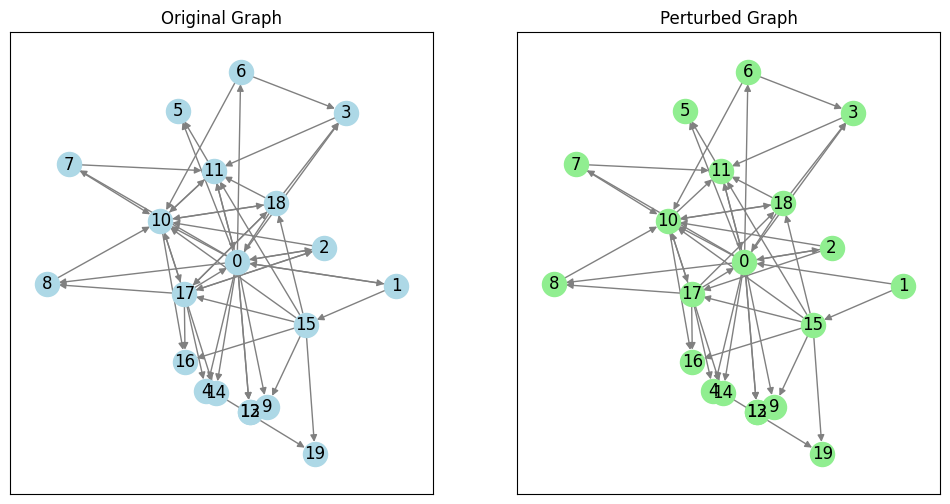

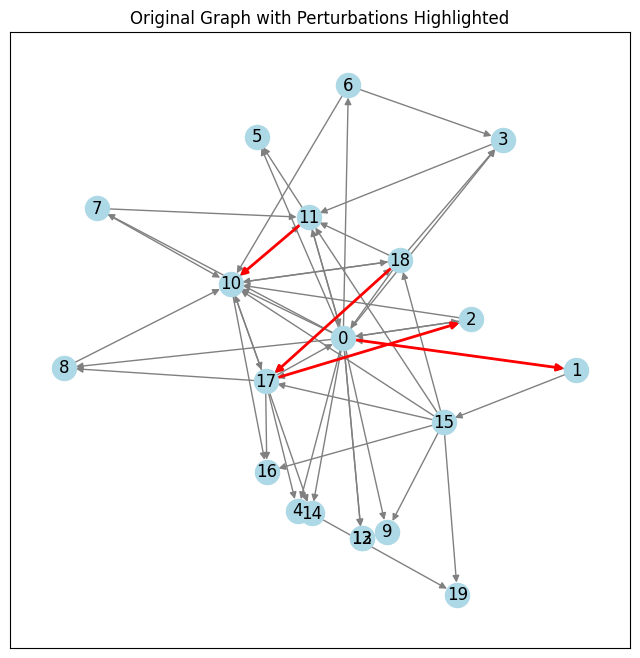

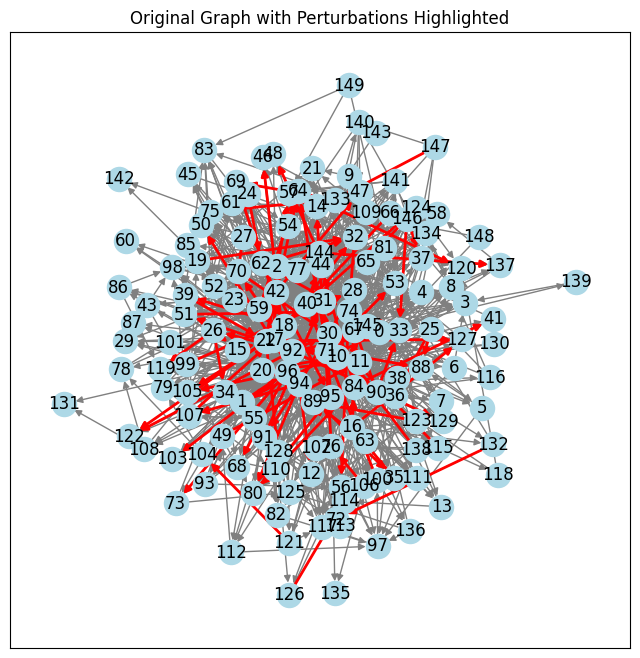

In [13]:
import networkx as nx
from pathlib import Path
import pickle
import matplotlib.pyplot as plt
import torch
from torch_geometric.utils import to_networkx

def load_graph(file_path):
    with open(file_path, 'rb') as f:
        graph = pickle.load(f)
    return graph

def print_graph_statistics(graph, name):
    print(f"Statistics for {name}:")
    
    if hasattr(graph, 'edge_index'):
        num_nodes = graph.x.size(0) if graph.x is not None else graph.num_nodes
        num_edges = graph.edge_index.size(1)
        
        print(f"Number of nodes: {num_nodes}")
        print(f"Number of edges: {num_edges}")
        
        nx_graph = to_networkx(graph, to_undirected=False)
        
        avg_in = sum(dict(nx_graph.in_degree()).values()) / nx_graph.number_of_nodes()
        avg_out = sum(dict(nx_graph.out_degree()).values()) / nx_graph.number_of_nodes()
        print(f"Average in-degree: {avg_in:.2f}")
        print(f"Average out-degree: {avg_out:.2f}")
        print(f"Density: {nx.density(nx_graph):.4f}")
    
    else:
        print(f"Number of nodes: {graph.number_of_nodes()}")
        print(f"Number of edges: {graph.number_of_edges()}")
        
        avg_in = sum(dict(graph.in_degree()).values()) / graph.number_of_nodes()
        avg_out = sum(dict(graph.out_degree()).values()) / graph.number_of_nodes()
        print(f"Average in-degree: {avg_in:.2f}")
        print(f"Average out-degree: {avg_out:.2f}")
        print(f"Density: {nx.density(graph):.4f}")
    print()


def to_networkx_graph(graph):
    """Convert PyTorch Geometric Data object to NetworkX graph if needed"""
    if hasattr(graph, 'edge_index'):
        return to_networkx(graph, to_undirected=False)  # <-- keep directed edges
    return graph


# Load graphs
data_path = Path("data") / EXPERIMENT
original_graph = load_graph(data_path / "original.pkl")
perturbed_graph = load_graph(data_path / "graph.pkl")

# Print statistics
print_graph_statistics(original_graph, "Original Graph")
print_graph_statistics(perturbed_graph, "Perturbed Graph")

# Convert to NetworkX for visualization (directed)
original_nx = to_networkx_graph(original_graph)
perturbed_nx = to_networkx_graph(perturbed_graph)

# 2: Draw both graphs side by side
n = 20  # Number of nodes to visualize
original_nodes = list(original_nx.nodes())[:n]
perturbed_nodes = list(perturbed_nx.nodes())[:n]

# Create subgraphs for visualization
original_subgraph = original_nx.subgraph(original_nodes)
perturbed_subgraph = perturbed_nx.subgraph(perturbed_nodes)

# Use a consistent layout for both graphs
pos = nx.kamada_kawai_layout(original_subgraph)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
nx.draw_networkx_nodes(original_subgraph, pos=pos, node_color='lightblue')
nx.draw_networkx_labels(original_subgraph, pos=pos)
nx.draw_networkx_edges(original_subgraph, pos=pos, edge_color='gray', arrows=True)
plt.title("Original Graph")

plt.subplot(1, 2, 2)
nx.draw_networkx_nodes(perturbed_subgraph, pos=pos, node_color='lightgreen')
nx.draw_networkx_labels(perturbed_subgraph, pos=pos)
nx.draw_networkx_edges(perturbed_subgraph, pos=pos, edge_color='gray', arrows=True)
plt.title("Perturbed Graph")

plt.show()


# 3: Plot the original graph with perturbations highlighted
def highlight_changes(original_graph, perturbed_graph):
    original_nx = to_networkx_graph(original_graph)
    perturbed_nx = to_networkx_graph(perturbed_graph)
    
    removed_edges = set(original_nx.edges()) - set(perturbed_nx.edges())
    added_edges = set(perturbed_nx.edges()) - set(original_nx.edges())
    
    pos = nx.kamada_kawai_layout(original_nx)
    
    plt.figure(figsize=(8, 8))
    nx.draw_networkx_nodes(original_nx, pos=pos, node_color='lightblue')
    nx.draw_networkx_labels(original_nx, pos=pos)
    nx.draw_networkx_edges(original_nx, pos=pos, edge_color='gray', arrows=True)
    
    if removed_edges:
        nx.draw_networkx_edges(original_nx, pos=pos, edgelist=removed_edges,
                               edge_color='red', width=2, arrows=True)
    if added_edges:
        nx.draw_networkx_edges(perturbed_nx, pos=pos, edgelist=added_edges,
                               edge_color='green', width=2, arrows=True)
    
    plt.title("Original Graph with Perturbations Highlighted")
    plt.show()
    

highlight_changes(original_subgraph, perturbed_subgraph)
highlight_changes(original_graph, perturbed_graph)
